# Análisis 2da Encuesta de inserción de científicos en Chile

**Autor:** Roberto Muñoz <br />
**E-mail:** <rmunoz@metricarts.com> <br />
**Github:** <https://github.com/rpmunoz> <br />

Análisis preliminar de la [2da Encuesta de inserción de científicos](https://www.anip.cl/encuesta-insercion-2018) llevada a cabo por el Centro de estudios de la ANIP. 

In [2]:
import os
import shutil
import numpy as np
import pandas as pd
from scipy import stats, integrate

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from IPython.core.display import display, HTML

%matplotlib inline
params = {'legend.fontsize': 'large',
          'figure.figsize': (8, 6),
         'axes.labelsize': 'large',
         'axes.titlesize':'large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large',
         'axes.titlepad': 16,
         'axes.titlesize': 20,
         'axes.labelpad': 16,
         'axes.labelsize': 16,
         'lines.linewidth': 3,
         'lines.markersize': 8,
         'xtick.labelsize': 12,
         'ytick.labelsize': 12}
plt.rcParams.update(params)

sns.despine()
pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', 100)

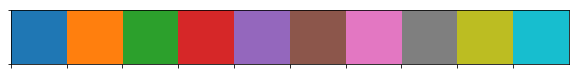

In [3]:
current_palette = sns.color_palette()
sns.palplot(current_palette)

In [4]:
def autopct_generator(limit):
    def inner_autopct(pct):
        return ('%.1f%%' % pct) if pct > limit else ''
    return inner_autopct

## 1. Cargamos el nuevo archivo de datos

Revisaremos los valores de algunos campos

In [5]:
encuesta_clean_file="../encuesta/E2018-full-answers-clean.csv"

encuesta_full_df=pd.read_csv(encuesta_clean_file)
encuesta_full_df.head()

,ID de la respuesta,Fecha en que inició,Fecha de la ultima accion,¿Cuál es el grado académico más alto que has obtenido?,¿En qué disciplina y área clasificarías tu pregrado?,¿En qué disciplina y área clasificarías tu pregrado? [Otro],¿En qué año obtuviste tu pregrado?,¿En qué disciplina y área clasificarías tu {postgrado}?,¿En qué disciplina y área clasificarías tu {postgrado}? [Otro],¿En qué año obtuviste tu {postgrado}?,¿En qué lugar realizaste tu {postgrado}?,"En total, ¿cuántos artículos revisados por pares (peer-reviewed) has publicado en los últimos 5 años?","¿Cómo financiaste tus estudios de {postgrado}? [Fondos personales (e.g., ahorros, aporte familiar, etc.)]","¿Cómo financiaste tus estudios de {postgrado}? [Trabajo durante el estudio (e.g., pasantías, ayudantías, etc.)]","¿Cómo financiaste tus estudios de {postgrado}? [Fondos no personales nacionales (e.g., becas Conicyt, Becas Chile, premios, etc.)]","¿Cómo financiaste tus estudios de {postgrado}? [Fondos no personales extranjeros (e.g., becas o premios de universidad de estudios)]",¿Qué tipo de trabajo desempeñaste para financiar tus estudios? [Ayudantía(s) en mi área de estudio],¿Qué tipo de trabajo desempeñaste para financiar tus estudios? [Ayudantía(s) en otra área de estudio],¿Qué tipo de trabajo desempeñaste para financiar tus estudios? [Pasantía(s) en otros lugares de estudio o centros de investigación],"¿Qué tipo de trabajo desempeñaste para financiar tus estudios? [Trabajo en mi lugar de estudio, sin relación con mis estudios]",¿Qué tipo de trabajo desempeñaste para financiar tus estudios? [Trabajo fuera de mi lugar de estudio],¿Qué tipo de trabajo desempeñaste para financiar tus estudios? [Trabajo remoto de cualquier tipo],¿Qué tipo de trabajo desempeñaste para financiar tus estudios? [Otro],¿Con qué tipo de fondos nacionales financiaste tu {postgrado}? [Beca o premio (por favor indica el nombre de la beca o premio)],¿Con qué tipo de fondos nacionales financiaste tu {postgrado}? [Comentario],¿Con qué tipo de fondos nacionales financiaste tu {postgrado}? [Crédito de un banco (por favor indica el nombre del banco)],¿Con qué tipo de fondos nacionales financiaste tu {postgrado}? [Comentario].1,¿Con qué tipo de fondos nacionales financiaste tu {postgrado}? [Financiamiento de empleador (por favor indica el nombre del empleador)],¿Con qué tipo de fondos nacionales financiaste tu {postgrado}? [Comentario].2,¿Con qué tipo de fondos nacionales financiaste tu {postgrado}? [Otro tipo de fondos (por favor indica qué tipo)],¿Con qué tipo de fondos nacionales financiaste tu {postgrado}? [Comentario].3,¿Con qué tipo de fondos extranjeros financiaste tu {postgrado}? [Beca o premio (por favor indica el nombre de la beca o premio)],¿Con qué tipo de fondos extranjeros financiaste tu {postgrado}? [Comentario],¿Con qué tipo de fondos extranjeros financiaste tu {postgrado}? [Crédito de un banco (por favor indica el nombre del banco)],¿Con qué tipo de fondos extranjeros financiaste tu {postgrado}? [Comentario].1,¿Con qué tipo de fondos extranjeros financiaste tu {postgrado}? [Financiamiento de empleador (por favor indica el nombre del empleador)],¿Con qué tipo de fondos extranjeros financiaste tu {postgrado}? [Comentario].2,¿Con qué tipo de fondos extranjeros financiaste tu {postgrado}? [Otro tipo de fondos (por favor indica qué tipo)],¿Con qué tipo de fondos extranjeros financiaste tu {postgrado}? [Comentario].3,¿Estás realizando o has realizado algún postdoctorado?,¿En qué disciplina y área clasificarías tu postdoctorado?,¿En qué disciplina y área clasificarías tu postdoctorado? [Otro],"¿En qué año terminaste tu postdoctorado? Si actuamente estás haciendo un postdoctorado, por favor responde ""Estoy haciendo un postdoctorado ahora"".",¿En qué lugar realizaste (o estás realizando) tu postdoctorado?,¿Has terminado más de un postdoctorado?,¿Cuántos postdoctorados has realizado?,¿Estás en Chile ahora?,¿Tuviste que renunciar a algún trabajo u oportunidad académica por volver a Chil

In [6]:
len(encuesta_full_df)

752

In [7]:
encuesta_full_df.dtypes.to_frame().transpose()

,ID de la respuesta,Fecha en que inició,Fecha de la ultima accion,¿Cuál es el grado académico más alto que has obtenido?,¿En qué disciplina y área clasificarías tu pregrado?,¿En qué disciplina y área clasificarías tu pregrado? [Otro],¿En qué año obtuviste tu pregrado?,¿En qué disciplina y área clasificarías tu {postgrado}?,¿En qué disciplina y área clasificarías tu {postgrado}? [Otro],¿En qué año obtuviste tu {postgrado}?,¿En qué lugar realizaste tu {postgrado}?,"En total, ¿cuántos artículos revisados por pares (peer-reviewed) has publicado en los últimos 5 años?","¿Cómo financiaste tus estudios de {postgrado}? [Fondos personales (e.g., ahorros, aporte familiar, etc.)]","¿Cómo financiaste tus estudios de {postgrado}? [Trabajo durante el estudio (e.g., pasantías, ayudantías, etc.)]","¿Cómo financiaste tus estudios de {postgrado}? [Fondos no personales nacionales (e.g., becas Conicyt, Becas Chile, premios, etc.)]","¿Cómo financiaste tus estudios de {postgrado}? [Fondos no personales extranjeros (e.g., becas o premios de universidad de estudios)]",¿Qué tipo de trabajo desempeñaste para financiar tus estudios? [Ayudantía(s) en mi área de estudio],¿Qué tipo de trabajo desempeñaste para financiar tus estudios? [Ayudantía(s) en otra área de estudio],¿Qué tipo de trabajo desempeñaste para financiar tus estudios? [Pasantía(s) en otros lugares de estudio o centros de investigación],"¿Qué tipo de trabajo desempeñaste para financiar tus estudios? [Trabajo en mi lugar de estudio, sin relación con mis estudios]",¿Qué tipo de trabajo desempeñaste para financiar tus estudios? [Trabajo fuera de mi lugar de estudio],¿Qué tipo de trabajo desempeñaste para financiar tus estudios? [Trabajo remoto de cualquier tipo],¿Qué tipo de trabajo desempeñaste para financiar tus estudios? [Otro],¿Con qué tipo de fondos nacionales financiaste tu {postgrado}? [Beca o premio (por favor indica el nombre de la beca o premio)],¿Con qué tipo de fondos nacionales financiaste tu {postgrado}? [Comentario],¿Con qué tipo de fondos nacionales financiaste tu {postgrado}? [Crédito de un banco (por favor indica el nombre del banco)],¿Con qué tipo de fondos nacionales financiaste tu {postgrado}? [Comentario].1,¿Con qué tipo de fondos nacionales financiaste tu {postgrado}? [Financiamiento de empleador (por favor indica el nombre del empleador)],¿Con qué tipo de fondos nacionales financiaste tu {postgrado}? [Comentario].2,¿Con qué tipo de fondos nacionales financiaste tu {postgrado}? [Otro tipo de fondos (por favor indica qué tipo)],¿Con qué tipo de fondos nacionales financiaste tu {postgrado}? [Comentario].3,¿Con qué tipo de fondos extranjeros financiaste tu {postgrado}? [Beca o premio (por favor indica el nombre de la beca o premio)],¿Con qué tipo de fondos extranjeros financiaste tu {postgrado}? [Comentario],¿Con qué tipo de fondos extranjeros financiaste tu {postgrado}? [Crédito de un banco (por favor indica el nombre del banco)],¿Con qué tipo de fondos extranjeros financiaste tu {postgrado}? [Comentario].1,¿Con qué tipo de fondos extranjeros financiaste tu {postgrado}? [Financiamiento de empleador (por favor indica el nombre del empleador)],¿Con qué tipo de fondos extranjeros financiaste tu {postgrado}? [Comentario].2,¿Con qué tipo de fondos extranjeros financiaste tu {postgrado}? [Otro tipo de fondos (por favor indica qué tipo)],¿Con qué tipo de fondos extranjeros financiaste tu {postgrado}? [Comentario].3,¿Estás realizando o has realizado algún postdoctorado?,¿En qué disciplina y área clasificarías tu postdoctorado?,¿En qué disciplina y área clasificarías tu postdoctorado? [Otro],"¿En qué año terminaste tu postdoctorado? Si actuamente estás haciendo un postdoctorado, por favor responde ""Estoy haciendo un postdoctorado ahora"".",¿En qué lugar realizaste (o estás realizando) tu postdoctorado?,¿Has terminado más de un postdoctorado?,¿Cuántos postdoctorados has realizado?,¿Estás en Chile ahora?,¿Tuviste que renunciar a algún trabajo u oportunidad académica por volver a Chil

## 2. Análisis exploratorio

In [75]:
field_names_full=['ID de la respuesta',
                  '¿Cuál es el grado académico más alto que has obtenido?',
                  '¿En qué año obtuviste tu pregrado?',
                  '¿En qué disciplina y área clasificarías tu pregrado?',
                  '¿En qué año obtuviste tu {postgrado}?',
                  '¿En qué disciplina y área clasificarías tu {postgrado}?',
                  '¿En qué lugar realizaste tu {postgrado}?',
                  '¿Estás realizando o has realizado algún postdoctorado?',
                  '¿En qué disciplina y área clasificarías tu postdoctorado?',
                  '¿En qué lugar realizaste (o estás realizando) tu postdoctorado?',
                  '¿Estás en Chile ahora?',
                  'Actualmente, ¿tienes trabajo remunerado en Chile?',
                  'Actualmente, ¿estás buscando trabajo?',
                  '¿Crees que seguirás desempeñando este trabajo remunerado en julio de 2018?',
                  '¿En qué institución o área realizas tu trabajo?',
                  '¿A qué sector económico pertenece este trabajo?',
                  '¿Qué tipo de relación laboral tienes en este trabajo?',
                  'Respecto de tu trabajo, ¿qué tan satisfecho estás con...? [Tu estabilidad laboral]',
                  'Respecto de tu trabajo, ¿qué tan satisfecho estás con...? [El reto intelectual que supone el trabajo]',
                  '¿Cuál es tu género?',
                  '¿Cuál es tu edad?',
                  '¿Cuál es tu nacionalidad? En caso de tener más de una nacionalidad, por favor escoge tu país de origen (donde naciste).',
                  'Finalmente, ¿cuál es tu opinión sobre el sistema de ciencia y tecnología en Chile, y sobre el proceso de inserción de científicos en Chile?',
                  '¿Has sufrido algún tipo de discriminación en tu(s) trabajo(s) como científico o científica? [No he sufrido discriminación]',
                  '¿Has sufrido algún tipo de discriminación en tu(s) trabajo(s) como científico o científica? [Sí, discriminación de género]',
                  '¿Has sufrido algún tipo de discriminación en tu(s) trabajo(s) como científico o científica? [Sí, discriminación por ser extranjero/a]',
                  '¿Has sufrido algún tipo de discriminación en tu(s) trabajo(s) como científico o científica? [Sí, discriminación por tener discapacidad]',
                  '¿Has sufrido algún tipo de discriminación en tu(s) trabajo(s) como científico o científica? [Sí, discriminación por tener hijos o hijas]',
                  '¿Has sufrido algún tipo de discriminación en tu(s) trabajo(s) como científico o científica? [Sí, discriminación por estar sobrecalificado]',
                  '¿Has sufrido algún tipo de discriminación en tu(s) trabajo(s) como científico o científica? [Otro]']

field_names=['ID',
             'Grado académico',
             'Año obtención pregrado',
             'Area pregrado',
             'Año obtención postgrado',
             'Area postgrado',
             'País postgrado',
             'Postdoctorado',
             'Area postdoctorado',
             'País postdoctorado',
             'Estas en Chile',
             'Tiene trabajo remunerado',
             'Buscando trabajo',
             'Permanencia trabajo',
             'Sector empleo',
             'Sector económico',
             'Tipo de contrato',
             'Estabilidad laboral',
             'Reto intelectual',
             'Genero',
             'Edad',
             'Nacionalidad',
             'Opinión sistema CTI',
             'No he sufrido discriminación',
             'Discriminación de género',
             'Discriminación por ser extranjero/a',
             'Discriminación por tener discapacidad',
             'Discriminación por tener hijos/as',
             'Discriminación por estar sobrecalificado',
             'Discriminación otro']

encuesta_df=encuesta_full_df[field_names_full].copy()
encuesta_df.columns=field_names

encuesta_df.head()

,ID,Grado académico,Año obtención pregrado,Area pregrado,Año obtención postgrado,Area postgrado,País postgrado,Postdoctorado,Area postdoctorado,País postdoctorado,Estas en Chile,Tiene trabajo remunerado,Buscando trabajo,Permanencia trabajo,Sector empleo,Sector económico,Tipo de contrato,Estabilidad laboral,Reto intelectual,Genero,Edad,Nacionalidad,Opinión sistema CTI,No he sufrido discriminación,Discriminación de género,Discriminación por ser extranjero/a,Discriminación por tener discapacidad,Discriminación por tener hijos/as,Discriminación por estar sobrecalificado,Discriminación otro
0,41,Doctorado (PhD),2003,Ciencias Naturales:Ciencias Biológicas,2017,Ciencias Naturales:Ciencias Biológicas,Chile,No,NaN,NaN,NaN,Sí,NaN,Sí,Universidad pública/tradicional,Sector Primario:Pesca,Contrato con plazo fijo,6,6,Masculino,40.0,Chile,"Los fondos de financiamiento público de CyT actualmente son bajos, lo que aumenta la competivida...",Sí,NaN,NaN,NaN,NaN,NaN,NaN
1,42,Doctorado (PhD),2004,Humanidades:Lenguaje y Literatura,2017,Humanidades:Lenguaje y Literatura,España,No,NaN,NaN,"Sí, estoy en Chile de manera definitiva",No,Sí,NaN,NaN,NaN,NaN,NaN,NaN,Femenino,37.0,Chile,Pésimo. Soy la única doctora en Chilenconó mi doctorado y estoy cesante. Me invitaron al congr...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,43,Magíster (MSc),2014,Ciencias Sociales:Ciencias de la Educación,2018,Ciencias Médicas y de la Salud:Ciencias de la Salud,Chile,NaN,NaN,NaN,NaN,No,Sí,NaN,NaN,NaN,NaN,NaN,NaN,Masculino,36.0,Chile,"No existe el sistema. Lo que existe es la voluntad administrativa de mejorar las ciencias, pero ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,44,Doctorado (PhD),2012,Ciencias Naturales:Ciencias Químicas,2016,Ciencias Naturales:Ciencias Químicas,Chile,Sí,Ingeniería y Tecnología:Ingeniería Ambiental,Chile,NaN,Sí,NaN,No estoy seguro(a),Universidad pública/tradicional,Sector Cuaternario:Investigación científica,Contrato a honorario,2,7 (Muy satisfecho),Masculino,31.0,Chile,El proceso de inserción es muy deficiente considerando la cantidad de doctorandos que se están g...,Sí,NaN,NaN,NaN,NaN,NaN,NaN
4,45,Doctorado (PhD),2010,Ciencias Naturales:Matemáticas,2017,Ciencias Naturales:Matemáticas,Francia,No,NaN,NaN,"Sí, estoy en Chile de manera definitiva",Sí,NaN,Sí,Sector Empresarial,Sector Cuaternario:Tecnologías de la información,Contrato indefinido,7 (Muy satisfecho),4 (Ni satisfecho ni insatisfecho),Masculino,31.0,Chile,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Seleccionamos solo a las personas con grado académico de Doctorado

In [76]:
encuesta_df=encuesta_df[encuesta_df['Grado académico']=='Magíster (MSc)']
len(encuesta_df)

212

In [77]:
for field_name in field_names:
    if field_name != "Opinión sistema CTI":
        print("Field: ", field_name)
        print(encuesta_df[field_name].unique())

Field:  ID
[  43   54   72   74   81   82   96  103  106  107  109  113  114  117  120
  141  146  147  148  153  154  158  159  160  162  179  186  192  195  197
  200  202  205  208  224  241  244  247  257  261  267  273  274  276  277
  286  287  290  291  297  301  303  305  307  316  317  318  324  334  346
  355  360  364  367  373  379  387  392  398  404  435  437  438  442  444
  448  450  460  461  470  472  475  481  500  509  513  515  520  521  523
  528  529  537  543  554  560  561  563  574  575  587  589  591  592  596
  598  600  605  624  637  640  644  645  653  656  664  666  668  671  677
  680  685  686  692  695  703  714  715  718  745  746  747  748  755  762
  768  771  772  776  777  779  790  805  808  810  813  823  835  840  841
  847  849  850  852  853  866  869  870  873  877  880  887  890  892  893
  895  896  899  903  912  914  931  939  951  957  961  963  964  969  971
  973  977  980  988  989  991 1000 1006 1022 1024 1039 1040 1048 1049 1058
 

Revisamos categorias del campo año de obtención de pregrado y postgrado

In [78]:
encuesta_df.loc[encuesta_df['Año obtención pregrado']=='Antes de 1990','Año obtención pregrado']=1990
encuesta_df.loc[encuesta_df['Año obtención postgrado']=='Antes de 1990','Año obtención postgrado']=1990

Revisamos los casos en que la persona reporta que obtuvo el postgrado un año despues del pregrado

In [79]:
encuesta_df['Año obtención pregrado'] = encuesta_df['Año obtención pregrado'].astype(int)
encuesta_df['Año obtención postgrado'] = encuesta_df['Año obtención postgrado'].astype(int)

pregrado_incorrecto = (encuesta_df['Año obtención postgrado']-encuesta_df['Año obtención pregrado']) < 1
print("Numero de pregrado incorrecto: ", len(encuesta_df[pregrado_incorrecto]))
encuesta_df[pregrado_incorrecto]

Numero de pregrado incorrecto:  12


,ID,Grado académico,Año obtención pregrado,Area pregrado,Año obtención postgrado,Area postgrado,País postgrado,Postdoctorado,Area postdoctorado,País postdoctorado,Estas en Chile,Tiene trabajo remunerado,Buscando trabajo,Permanencia trabajo,Sector empleo,Sector económico,Tipo de contrato,Estabilidad laboral,Reto intelectual,Genero,Edad,Nacionalidad,Opinión sistema CTI,No he sufrido discriminación,Discriminación de género,Discriminación por ser extranjero/a,Discriminación por tener discapacidad,Discriminación por tener hijos/as,Discriminación por estar sobrecalificado,Discriminación otro
28,81,Magíster (MSc),2011,Ciencias Naturales:Ciencias Biológicas,2011,Ciencias Naturales:Ciencias Biológicas,Chile,NaN,NaN,NaN,NaN,No,No,NaN,NaN,NaN,NaN,NaN,NaN,Masculino,32.0,Chile,"Actualmente me encuentro haciendo un doctorado que espero finalizar este año 2018. Luego, la ins...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
111,195,Magíster (MSc),2010,"Ciencias Agrícolas:Agricultura, Silvicultura y Pesca",2010,"Ciencias Agrícolas:Agricultura, Silvicultura y Pesca",Chile,NaN,NaN,NaN,NaN,No,No,NaN,NaN,NaN,NaN,NaN,NaN,Masculino,NaN,Chile,"Precario, tanto para los jóvenes recién egresados como para aquellos que obtuvieron un doctorado...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
116,200,Magíster (MSc),2015,Ciencias Naturales:Ciencias Físicas,2015,Ciencias Naturales:Ciencias Físicas,Chile,NaN,NaN,NaN,NaN,Sí,NaN,Sí,Universidad pública/tradicional,Sector Cuaternario:Educación,Contrato con plazo fijo,5,6,Masculino,43.0,Chile,en General es poco transparente. Hay mucha gente que se ha formado en áreas académicas en docenc...,Sí,NaN,NaN,NaN,NaN,NaN,NaN
118,202,Magíster (MSc),2013,Ciencias Naturales:Ciencias Biológicas,2013,Ciencias Naturales:Ciencias Biológicas,Chile,NaN,NaN,NaN,NaN,No,No,NaN,NaN,NaN,NaN,NaN,NaN,Prefiero no responder,31.0,Chile,"Creo que hay graves falencias respecto a la inserción de los científicos en Chile, en particular...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
188,316,Magíster (MSc),2013,Ciencias Naturales:Ciencias Biológicas,2013,Ciencias Naturales:Ciencias Biológicas,Chile,NaN,NaN,NaN,NaN,No,Sí,NaN,NaN,NaN,NaN,NaN,NaN,Femenino,32.0,Chile,"El sistema de ciencia en Chile es muy precario, inestabilidad laboral que depende de la adjudica...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
197,334,Magíster (MSc),2017,Ingeniería y Tecnología:Biotecnología Ambiental,2017,Ingeniería y Tecnología:Nanotecnología,Chile,NaN,NaN,NaN,NaN,No,Sí,NaN,NaN,NaN,NaN,NaN,NaN,Femenino,26.0,Chile,"Por lo que he visto está un poco sesgado el perfil buscado, o buscan técnicos que salen más econ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
332,515,Magíster (MSc),2015,Ciencias Naturales:Ciencias Biológicas,2015,Ciencias Naturales:Ciencias Biológicas,Chile,NaN,NaN,NaN,NaN,Sí,NaN,No,Otro,Sector Terciario:Salud,Contrato a honorario,5,6,Femenino,27.0,Chile,"Es un pésimo sistema, sobretodo para las mujeres. Después de años de estudios y especializacione...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
423,656,Magíster (MSc),2012,Humanidades:Historia y Arqueología,2012,Otro,Chile,NaN,NaN,NaN,NaN,Sí,NaN,No estoy seguro(a),Administración pública,Sector Cuaternario:Gobierno,Contrato a honorario,6,1 (Muy insatisfecho),Femenino,33.0,Chile,"Respecto al área en el cual me desempeño, un científico es simplemente un secretario, burócrata ...",No,Sí,No,No,Sí,Sí,"procedencia universitaria, falta de confianza, por ser sincero!"
620,931,Magíster (MSc),2015,Ciencias Naturales:Ciencias de la Tierra y Medioambientales,2015,Ciencias Naturales:Ciencias de la Tierra y Medioambientales,México,NaN,NaN,NaN,"Sí, estoy en Chile de manera definitiva",No,Sí,NaN,NaN,NaN,NaN,NaN,NaN,Femenino,31.0,Chile,La reinserción se dificulta con la baja disponibilidad de trabajos en condiciones laborales que ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
648,971,Magíster (MSc),2014,Ciencias Naturales:Ciencias Biológicas,2014,Ciencias Naturales:Ciencias Biológicas,Canadá,NaN,NaN,NaN,"No, pero tengo que volver a Chile",No,No,NaN,NaN,NaN,NaN,NaN,NaN,Prefiero no responder,40.0,Chile,"Tengo un trabajo en Canad

In [80]:
encuesta_df.loc[pregrado_incorrecto,'Año obtención pregrado'] = 0

Revisamos categorias del campo situación laboral

In [81]:
encuesta_df['Situacion laboral']=np.NaN
encuesta_df.loc[encuesta_df['Tiene trabajo remunerado']=='Sí','Situacion laboral']='Ocupado'
encuesta_df.loc[encuesta_df['Tiene trabajo remunerado']=='No','Situacion laboral']='Desempleado'
encuesta_df.loc[(encuesta_df['Tiene trabajo remunerado']=='No') & (encuesta_df['Buscando trabajo']=='No'),'Situacion laboral']='Inactivo'

Revisamos el pais de residencia de las personas que declaran estan desempleadas e inactivas

In [82]:
encuesta_df[encuesta_df['Situacion laboral']=='Desempleado']

,ID,Grado académico,Año obtención pregrado,Area pregrado,Año obtención postgrado,Area postgrado,País postgrado,Postdoctorado,Area postdoctorado,País postdoctorado,Estas en Chile,Tiene trabajo remunerado,Buscando trabajo,Permanencia trabajo,Sector empleo,Sector económico,Tipo de contrato,Estabilidad laboral,Reto intelectual,Genero,Edad,Nacionalidad,Opinión sistema CTI,No he sufrido discriminación,Discriminación de género,Discriminación por ser extranjero/a,Discriminación por tener discapacidad,Discriminación por tener hijos/as,Discriminación por estar sobrecalificado,Discriminación otro,Situacion laboral
2,43,Magíster (MSc),2014,Ciencias Sociales:Ciencias de la Educación,2018,Ciencias Médicas y de la Salud:Ciencias de la Salud,Chile,NaN,NaN,NaN,NaN,No,Sí,NaN,NaN,NaN,NaN,NaN,NaN,Masculino,36.0,Chile,"No existe el sistema. Lo que existe es la voluntad administrativa de mejorar las ciencias, pero ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Desempleado
43,103,Magíster (MSc),2010,Ciencias Sociales:Derecho,2018,Ciencias Sociales:Derecho,Chile,NaN,NaN,NaN,NaN,No,Sí,NaN,NaN,NaN,NaN,NaN,NaN,Femenino,32.0,Chile,"Es débil. No es relevante tener un magíster o doctorado, sea especializado o no. Funciona al sis...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Desempleado
45,107,Magíster (MSc),2003,Ciencias Sociales:Sociología,2014,Ciencias Sociales:Sociología,Chile,NaN,NaN,NaN,NaN,No,Sí,NaN,NaN,NaN,NaN,NaN,NaN,Femenino,38.0,Chile,no existe manera de comenzar sin estar al alero de vacas sagradas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Desempleado
103,186,Magíster (MSc),2013,Ciencias Sociales:Sociología,2017,Ciencias Sociales:Sociología,Chile,NaN,NaN,NaN,NaN,No,Sí,NaN,NaN,NaN,NaN,NaN,NaN,Femenino,NaN,Chile,"La beca de Magíster Nacional no cuenta con un programa de inserción científica, de manera que la...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Desempleado
109,192,Magíster (MSc),2003,"Ciencias Agrícolas:Agricultura, Silvicultura y Pesca",2014,"Ciencias Agrícolas:Agricultura, Silvicultura y Pesca",Chile,NaN,NaN,NaN,NaN,No,Sí,NaN,NaN,NaN,NaN,NaN,NaN,Masculino,38.0,Ecuador,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Desempleado
150,247,Magíster (MSc),2017,Ciencias Naturales:Ciencias de la Tierra y Medioambientales,2018,Ciencias Naturales:Ciencias de la Tierra y Medioambientales,Chile,NaN,NaN,NaN,NaN,No,Sí,NaN,NaN,NaN,NaN,NaN,NaN,Femenino,28.0,Chile,Es practicamente imposible que un gobierno que invierte 0.28% de su PIB a la ciencia logre mante...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Desempleado
155,261,Magíster (MSc),2015,Ciencias Naturales:Ciencias Químicas,2016,Ciencias Naturales:Ciencias Biológicas,Chile,NaN,NaN,NaN,NaN,No,Sí,NaN,NaN,NaN,NaN,NaN,NaN,Femenino,28.0,Chile,"Oferta laboral concentrada en la zona central, poca oferta laboral en general. \nCarencia de con...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Desempleado
163,274,Magíster (MSc),2010,Ingeniería y Tecnología:Biotecnología Industrial,2014,Ciencias Naturales:Ciencias Biológicas,Chile,NaN,NaN,NaN,NaN,No,Sí,NaN,NaN,NaN,NaN,NaN,NaN,Masculino,30.0,Chile,"Los profesionales que apoyamos la investigación, deberíamos tener la opción de traspasar nuestro...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Desempleado
165,276,Magíster (MSc),2008,Humanidades:Lenguaje y Literatura,2015,Humanidades:Historia y Arqueología,Australia,NaN,NaN,NaN,"Sí, estoy en Chile de manera definitiva",No,Sí,NaN,NaN,NaN,NaN,NaN,NaN,Masculino,34.0,Chile,Me parece que no debería estar regulado ni recibir subvenciones estatales.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Desempleado
171,286,Magíster (MSc),2016,"Ciencias Agrícolas:Agricultura, Silvicultura y Pesca",2017,"Ciencias Agrícolas:Agricultura, Silvicultura y Pesca",Chile,NaN,NaN,NaN,NaN,No,Sí,NaN,NaN,NaN,NaN,NaN,NaN,Masculino,25.0,Chile,"Sistema de ciencia y Tecnología en Chile pobre, trabajos mal remunerados y precario sistema prev...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Desempleado


In [83]:
encuesta_df[encuesta_df['Situacion laboral']=='Desempleado'].groupby('Genero').size()

Genero
Femenino     28
Masculino    20
dtype: int64

Revisamos la discriminación en el empleo

In [84]:
encuesta_df['Discriminación']=np.NaN
encuesta_df.loc[encuesta_df['No he sufrido discriminación']=='Sí','Discriminación']='No'

encuesta_df.loc[encuesta_df['Discriminación de género']=='Sí','Discriminación']='Sí'
encuesta_df.loc[encuesta_df['Discriminación por ser extranjero/a']=='Sí','Discriminación']='Sí'
encuesta_df.loc[encuesta_df['Discriminación por tener discapacidad']=='Sí','Discriminación']='Sí'
encuesta_df.loc[encuesta_df['Discriminación por tener hijos/as']=='Sí','Discriminación']='Sí'
encuesta_df.loc[encuesta_df['Discriminación por estar sobrecalificado']=='Sí','Discriminación']='Sí'
encuesta_df.loc[encuesta_df['Discriminación otro']=='Sí','Discriminación']='Sí'

In [85]:
encuesta_df.groupby('Discriminación').size()

Discriminación
No    56
Sí    24
dtype: int64

In [ ]:
encuesta_df['Tipo de discriminación']=np.NaN

encuesta_df.loc[encuesta_df['Discriminación de género']=='Sí','Discriminación']='Sí'
encuesta_df.loc[encuesta_df['Discriminación por ser extranjero/a']=='Sí','Discriminación']='Sí'
encuesta_df.loc[encuesta_df['Discriminación por tener discapacidad']=='Sí','Discriminación']='Sí'
encuesta_df.loc[encuesta_df['Discriminación por tener hijos/as']=='Sí','Discriminación']='Sí'
encuesta_df.loc[encuesta_df['Discriminación por estar sobrecalificado']=='Sí','Discriminación']='Sí'
encuesta_df.loc[encuesta_df['Discriminación otro']=='Sí','Discriminación']='Sí'

In [ ]:
'No he sufrido discriminación',
             'Discriminación de género',
             'Discriminación por ser extranjero/a',
             'Discriminación por tener discapacidad',
             'Discriminación por tener hijos/as',
             'Discriminación por estar sobrecalificado',
             'Discriminación otro'

Revisamos categorias del campo estabilidad laboral

In [18]:
encuesta_df.loc[encuesta_df['Estabilidad laboral']=='1 (Muy insatisfecho)','Estabilidad laboral']='1'
encuesta_df.loc[encuesta_df['Estabilidad laboral']=='4 (Ni satisfecho ni insatisfecho)','Estabilidad laboral']='4'
encuesta_df.loc[encuesta_df['Estabilidad laboral']=='7 (Muy satisfecho)','Estabilidad laboral']='7'

Revisamos categorias del campo Reto intelectual

In [19]:
encuesta_df.loc[encuesta_df['Reto intelectual']=='1 (Muy insatisfecho)','Reto intelectual']='1'
encuesta_df.loc[encuesta_df['Reto intelectual']=='4 (Ni satisfecho ni insatisfecho)','Reto intelectual']='4'
encuesta_df.loc[encuesta_df['Reto intelectual']=='7 (Muy satisfecho)','Reto intelectual']='7'

Acortamos el nombre de la categoría 'A honorarios ("Boletear sin contrato"

In [44]:
encuesta_df.loc[encuesta_df['Tipo de contrato']=='A honorarios ("Boletear sin contrato")','Tipo de contrato']="Boletear sin contrato"
encuesta_df['Tipo de contrato'].unique()

array([nan, 'Contrato a honorario', 'Contrato con plazo fijo',
       'Contrato indefinido', 'Boletear sin contrato',
       'Acuerdo de palabra', 'Independiente', 'Otro'], dtype=object)

Agregamos la categoria inactivo al campo 'Tiene trabajo remunerado'. Es útil para identificar a personas que responden No en 'Buscando trabajo'

In [45]:
field_dtypes={'Grado académico':'category',
              'Año obtención pregrado':int,
              'Año obtención postgrado':int,
              'Tiene trabajo remunerado':'category',
              'Buscando trabajo':'category',
              'Situacion laboral':'category',
              'Tipo de contrato':'category',
              'Permanencia trabajo':'category',
              'Sector empleo':'category',
              'Estabilidad laboral':'category',
              'Reto intelectual':'category',
              'Genero':'category',
              'Edad':float,
              'Nacionalidad':'category'}

for name, dtype in field_dtypes.items():
    encuesta_df[name] = encuesta_df[name].astype(dtype)
    
encuesta_df['Situacion laboral']=pd.Categorical(encuesta_df['Situacion laboral'], ["Ocupado", "Desempleado", "Inactivo"], ordered=True)
encuesta_df['Permanencia trabajo']=pd.Categorical(encuesta_df['Permanencia trabajo'], ["Sí", "No", "No estoy seguro(a)"], ordered=True)

In [46]:
len(encuesta_df)

212

# 2.1 Análisis demográfico

In [44]:
encuesta_df.groupby('Genero').size()

Genero
Femenino                 121
Masculino                 85
Otro (no binario)          2
Prefiero no responder      4
dtype: int64

In [45]:
age_bins=[0, 34, 44, 54, 64, 69]
age_labels=['< 35 años', '35-44 años', '45-54 años', '55-64 años', '65-69 años']
encuesta_df['Grupo etario']=pd.cut(encuesta_df['Edad'], age_bins, labels=age_labels)

data_plot=encuesta_df.groupby('Genero')['Grupo etario'].value_counts().unstack('Genero')
data_plot=data_plot.reindex(age_labels)
data_plot

Genero,Femenino,Masculino,Otro (no binario),Prefiero no responder
Grupo etario,,,,
< 35 años,77.0,59.0,2.0,2.0
35-44 años,32.0,21.0,NaN,1.0
45-54 años,7.0,4.0,NaN,NaN
55-64 años,1.0,NaN,NaN,NaN
65-69 años,NaN,NaN,NaN,NaN


In [46]:
data_plot.sum().sum()

206.0

In [47]:
data_plot_pct=(100*data_plot/data_plot.sum().sum()).round(1)
data_plot_pct

Genero,Femenino,Masculino,Otro (no binario),Prefiero no responder
Grupo etario,,,,
< 35 años,37.4,28.6,1.0,1.0
35-44 años,15.5,10.2,NaN,0.5
45-54 años,3.4,1.9,NaN,NaN
55-64 años,0.5,NaN,NaN,NaN
65-69 años,NaN,NaN,NaN,NaN


In [48]:
data_plot_pct.sum(axis=0)

Genero
Femenino                 56.8
Masculino                40.7
Otro (no binario)         1.0
Prefiero no responder     1.5
dtype: float64

In [49]:
data_plot_pct.sum(axis=1)

Grupo etario
< 35 años     68.0
35-44 años    26.2
45-54 años     5.3
55-64 años     0.5
65-69 años     0.0
dtype: float64

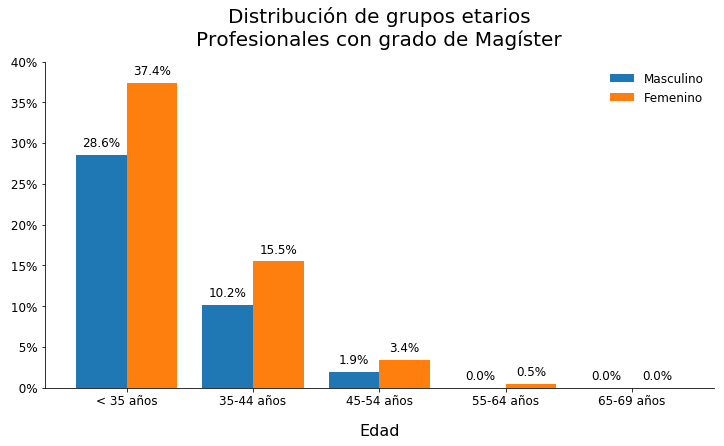

In [52]:
plot_classes=["Masculino","Femenino"]

fig, ax = plt.subplots(1,1, figsize=(12,6))
data_plot_pct[plot_classes].plot(kind='bar', ax=ax,
               fontsize=12, rot=0, width=0.8)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(frameon=False)

ax.set_ylim(0,40)
ax.set_xlabel('Edad')
plt.title("Distribución de grupos etarios\nProfesionales con grado de Magíster")

vals = ax.get_yticks()
ax.set_yticklabels(['{:3.0f}%'.format(x) for x in vals])

for p in ax.patches:
    ax.annotate("{:.1f}%".format(p.get_height()), (p.get_x() + 0.2, p.get_height() + 1),
               fontsize=12, horizontalalignment='center')

plt.savefig('figures/magister/figura_1_distribucion_grupo_etario.png', bbox_inches='tight')
plt.savefig('figures/magister/figura_1_distribucion_grupo_etario.pdf', bbox_inches='tight')

## 4.2 Año obtención de pregrado

In [70]:
data_plot=pd.DataFrame(encuesta_df.groupby('Año obtención pregrado').size(), columns=['Número de egresados'])
data_plot=data_plot[data_plot.index > 0]
data_plot.head()

,Número de egresados
Año obtención pregrado,
1990,1
1993,1
1994,1
1995,2
1996,1


In [71]:
data_plot['Percentage']=(100*data_plot/data_plot.sum().sum()).round(2)
data_plot.head()

,Número de egresados,Percentage
Año obtención pregrado,,
1990,1,0.5
1993,1,0.5
1994,1,0.5
1995,2,1.0
1996,1,0.5


In [72]:
data_plot['CumSum']=data_plot['Percentage'].cumsum()
data_plot.head()

,Número de egresados,Percentage,CumSum
Año obtención pregrado,,,
1990,1,0.5,0.5
1993,1,0.5,1.0
1994,1,0.5,1.5
1995,2,1.0,2.5
1996,1,0.5,3.0


In [73]:
data_plot['CumSum']

Año obtención pregrado
1990      0.5
1993      1.0
1994      1.5
1995      2.5
1996      3.0
1997      3.5
1998      4.5
1999      7.0
2000      8.5
2001     11.0
2002     12.5
2003     17.0
2004     19.0
2005     23.5
2006     28.0
2007     35.0
2008     44.0
2009     46.0
2010     57.0
2011     69.0
2012     79.0
2013     89.0
2014     94.0
2015     98.0
2016     99.0
2017    100.0
Name: CumSum, dtype: float64

In [74]:
print(data_plot.loc[2005:,'Percentage'].sum())
print(data_plot.loc[2005:,"Número de egresados"].sum())

print("Total de magister que reportan año pregrado: ", data_plot["Número de egresados"].sum())

81.0
162
Total de magister que reportan año pregrado:  200


In [75]:
encuesta_df[encuesta_df['Año obtención pregrado']>0]['Año obtención pregrado'].median()

2010.0

In [76]:
quartile_bins=[0, 25, 50, 75, 101]
quartile_labels=['q1', 'q2', 'q3', 'q4']
data_plot['Quartile']=pd.cut(data_plot['CumSum'], quartile_bins, labels=quartile_labels)
data_plot.head()

,Número de egresados,Percentage,CumSum,Quartile
Año obtención pregrado,,,,
1990,1,0.5,0.5,q1
1993,1,0.5,1.0,q1
1994,1,0.5,1.5,q1
1995,2,1.0,2.5,q1
1996,1,0.5,3.0,q1


In [77]:
colors = {'q1':current_palette[0],'q2':current_palette[1],'q3':current_palette[2],'q4':current_palette[3]}
data_plot['color'] = data_plot['Quartile'].map(colors)
data_plot.head()

,Número de egresados,Percentage,CumSum,Quartile,color
Año obtención pregrado,,,,,
1990,1,0.5,0.5,q1,"(0.12156862745098039, 0.4666666666666667, 0.7058823529411765)"
1993,1,0.5,1.0,q1,"(0.12156862745098039, 0.4666666666666667, 0.7058823529411765)"
1994,1,0.5,1.5,q1,"(0.12156862745098039, 0.4666666666666667, 0.7058823529411765)"
1995,2,1.0,2.5,q1,"(0.12156862745098039, 0.4666666666666667, 0.7058823529411765)"
1996,1,0.5,3.0,q1,"(0.12156862745098039, 0.4666666666666667, 0.7058823529411765)"


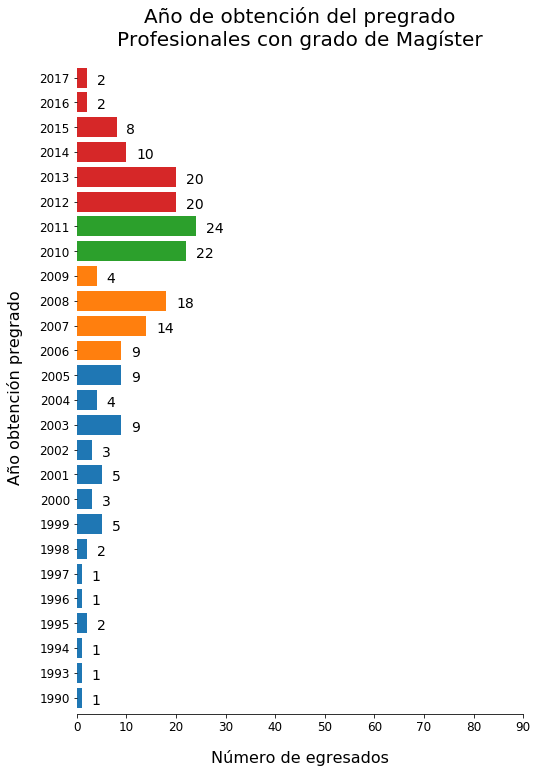

In [79]:
plot_field="Número de egresados"

fig, ax = plt.subplots(1,1, figsize=(8,12))
data_plot[plot_field].plot(kind='barh', ax=ax,
               fontsize=12, rot=0, width=0.8, color=data_plot['color'])

ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_xlim(0,90)
ax.set_xlabel('Número de egresados')
plt.title("Año de obtención del pregrado\nProfesionales con grado de Magíster")

for p in ax.patches:
    ax.annotate("{:d}".format(p.get_width()), (p.get_width() + 2, p.get_y()+0.3),
               fontsize=14, horizontalalignment='left', verticalalignment='center')
   
plt.savefig('figures/magister/figura_2_año_obtencion_pregrado.png', bbox_inches='tight')
plt.savefig('figures/magister/figura_2_año_obtencion_pregrado.pdf', bbox_inches='tight')

In [67]:
#encuesta_df.style.set_properties(subset=['Opinión sistema CTI'], **{'width': '300px'})
#encuesta_df[encuesta_df['Año obtención pregrado']==2017]

In [68]:
#encuesta_df[(encuesta_df['Año obtención postgrado']-encuesta_df['Año obtención pregrado']) < 3]

## 4.2 Año obtención de postgrado

In [80]:
data_plot=pd.DataFrame(encuesta_df.groupby('Año obtención postgrado').size(), columns=['Número de egresados'])
data_plot.head()

,Número de egresados
Año obtención postgrado,
2001,1
2002,2
2004,1
2005,2
2006,4


In [81]:
data_plot['Percentage']=(100*data_plot/data_plot.sum().sum()).round(2)
data_plot.head()

,Número de egresados,Percentage
Año obtención postgrado,,
2001,1,0.47
2002,2,0.94
2004,1,0.47
2005,2,0.94
2006,4,1.89


In [82]:
data_plot['CumSum']=data_plot['Percentage'].cumsum()
data_plot.head()

,Número de egresados,Percentage,CumSum
Año obtención postgrado,,,
2001,1,0.47,0.47
2002,2,0.94,1.41
2004,1,0.47,1.88
2005,2,0.94,2.82
2006,4,1.89,4.71


In [83]:
quartile_bins=[0, 25, 50, 75, 101]
quartile_labels=['q1', 'q2', 'q3', 'q4']
data_plot['Quartile']=pd.cut(data_plot['CumSum'], quartile_bins, labels=quartile_labels)
data_plot.head()

,Número de egresados,Percentage,CumSum,Quartile
Año obtención postgrado,,,,
2001,1,0.47,0.47,q1
2002,2,0.94,1.41,q1
2004,1,0.47,1.88,q1
2005,2,0.94,2.82,q1
2006,4,1.89,4.71,q1


In [84]:
colors = {'q1':current_palette[0],'q2':current_palette[1],'q3':current_palette[2],'q4':current_palette[3]}
data_plot['color'] = data_plot['Quartile'].map(colors)
data_plot.head()

,Número de egresados,Percentage,CumSum,Quartile,color
Año obtención postgrado,,,,,
2001,1,0.47,0.47,q1,"(0.12156862745098039, 0.4666666666666667, 0.7058823529411765)"
2002,2,0.94,1.41,q1,"(0.12156862745098039, 0.4666666666666667, 0.7058823529411765)"
2004,1,0.47,1.88,q1,"(0.12156862745098039, 0.4666666666666667, 0.7058823529411765)"
2005,2,0.94,2.82,q1,"(0.12156862745098039, 0.4666666666666667, 0.7058823529411765)"
2006,4,1.89,4.71,q1,"(0.12156862745098039, 0.4666666666666667, 0.7058823529411765)"


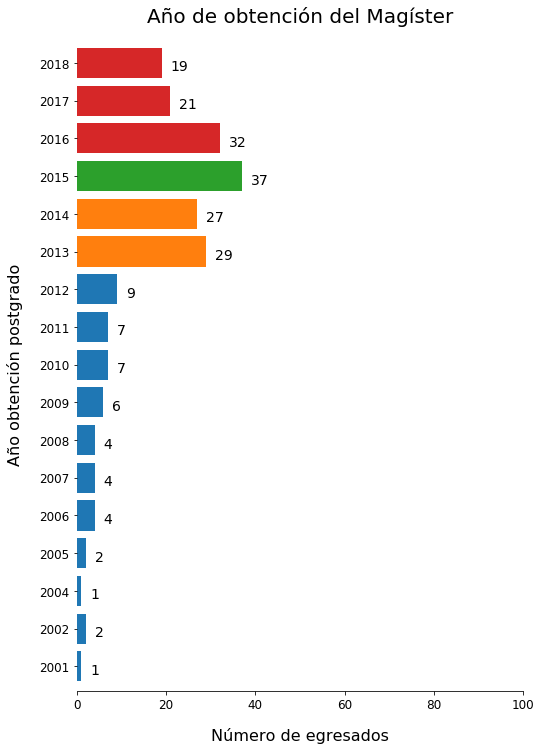

In [87]:
plot_field="Número de egresados"

fig, ax = plt.subplots(1,1, figsize=(8,12))
data_plot[plot_field].plot(kind='barh', ax=ax,
               fontsize=12, rot=0, width=0.8, color=data_plot['color'])

ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_xlim(0,100)
ax.set_xlabel('Número de egresados')
plt.title("Año de obtención del Magíster")

for p in ax.patches:
    ax.annotate("{:d}".format(p.get_width()), (p.get_width() + 2, p.get_y()+0.3),
               fontsize=14, horizontalalignment='left', verticalalignment='center')

plt.savefig('figures/magister/figura_3_año_obtencion_postgrado.png', bbox_inches='tight')
plt.savefig('figures/magister/figura_3_año_obtencion_postgrado.pdf', bbox_inches='tight')

## 4.3 Situación laboral

In [88]:
data_plot=encuesta_df.groupby('Genero')['Situacion laboral'].value_counts().unstack('Genero')
data_plot=data_plot.reindex(['Ocupado','Desempleado','Inactivo'])
data_plot

Genero,Femenino,Masculino,Otro (no binario),Prefiero no responder
Situacion laboral,,,,
Ocupado,72.0,41.0,NaN,1.0
Desempleado,28.0,20.0,NaN,NaN
Inactivo,19.0,23.0,2.0,3.0


In [298]:
data_plot.sum().sum()

515.0

In [202]:
data_plot_pct=(100*data_plot/data_plot.sum()).round(1)
data_plot_pct.head()

Genero,Femenino,Masculino,Otro (no binario),Prefiero no responder
Situacion laboral,,,,
Ocupado,80.3,79.0,100.0,57.1
Desempleado,18.4,13.0,NaN,35.7
Inactivo,1.3,8.0,NaN,7.1


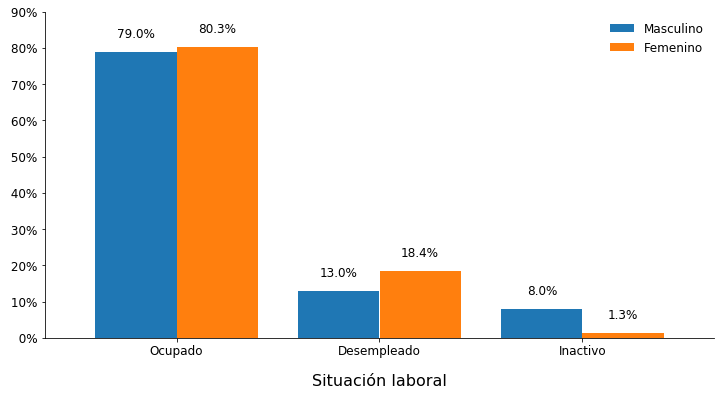

In [206]:
plot_classes=["Masculino","Femenino"]

fig, ax = plt.subplots(1,1, figsize=(12,6))
data_plot_pct[plot_classes].plot(kind='bar', ax=ax,
               fontsize=12, rot=0, width=0.8)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(frameon=False)

ax.set_ylim(0,90)
ax.set_xlabel('Situación laboral')
vals = ax.get_yticks()
ax.set_yticklabels(['{:3.0f}%'.format(x) for x in vals])

for p in ax.patches:
    ax.annotate("{:.1f}%".format(p.get_height()), (p.get_x() + 0.2, p.get_height() + 4),
               fontsize=12, horizontalalignment='center')

plt.savefig('figures/doctorado/figura_4_situacion_laboral.jpg', bbox_inches='tight')
plt.savefig('figures/doctorado/figura_4_situacion_laboral.pdf', bbox_inches='tight')

## Análisis permanencia en el trabajo

In [26]:
data_plot=encuesta_df.groupby('Permanencia trabajo').size()
data_plot

Permanencia trabajo
Sí                    72
No                    10
No estoy seguro(a)    32
dtype: int64

In [30]:
data_plot.sum()

114

In [27]:
data_plot_pct=(100*data_plot/data_plot.sum()).round(1)
data_plot_pct.head()

Permanencia trabajo
Sí                    63.2
No                     8.8
No estoy seguro(a)    28.1
dtype: float64

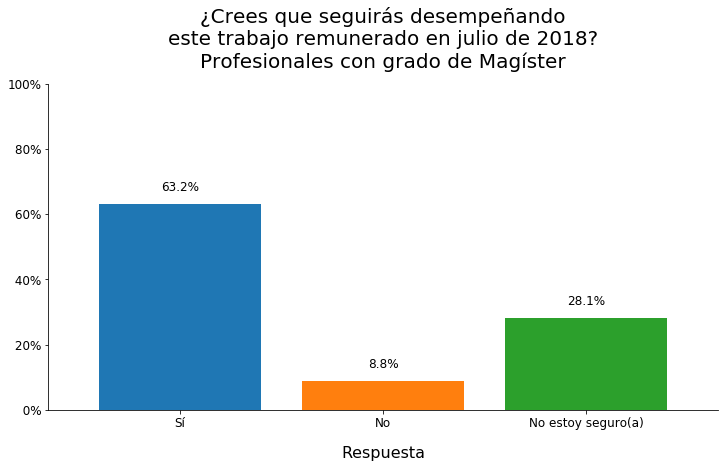

In [29]:
fig, ax = plt.subplots(1,1, figsize=(12,6))
data_plot_pct.plot(kind='bar', ax=ax,
               fontsize=12, rot=0, width=0.8)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.legend(frameon=False)

ax.set_ylim(0,100)
ax.set_xlabel('Respuesta')
plt.title("¿Crees que seguirás desempeñando\neste trabajo remunerado en julio de 2018?\nProfesionales con grado de Magíster")

vals = ax.get_yticks()
ax.set_yticklabels(['{:3.0f}%'.format(x) for x in vals])

for p in ax.patches:
    ax.annotate("{:.1f}%".format(p.get_height()), (p.get_x() + 0.4, p.get_height() + 4),
               fontsize=12, horizontalalignment='center')

plt.savefig('figures/magister/figura_6_permanencia_laboral.png', bbox_inches='tight')
plt.savefig('figures/magister/figura_6_permanencia_laboral.pdf', bbox_inches='tight')

## Empleo por sector laboral

In [64]:
data_plot=encuesta_df.groupby('Sector empleo').size().sort_values(ascending=False)
data_plot

Sector empleo
Universidad pública/tradicional    38
Universidad Privada                23
Sector Empresarial                 13
Otro                               11
Administración pública             10
Centro de investigación             8
Trabajador independiente            4
Institución sin fines de lucro      4
Instituto Profesional               3
dtype: int64

In [65]:
data_plot.sum()

114

In [66]:
data_plot_pct=(100*data_plot/data_plot.sum()).round(1)
data_plot_pct

Sector empleo
Universidad pública/tradicional    33.3
Universidad Privada                20.2
Sector Empresarial                 11.4
Otro                                9.6
Administración pública              8.8
Centro de investigación             7.0
Trabajador independiente            3.5
Institución sin fines de lucro      3.5
Instituto Profesional               2.6
dtype: float64

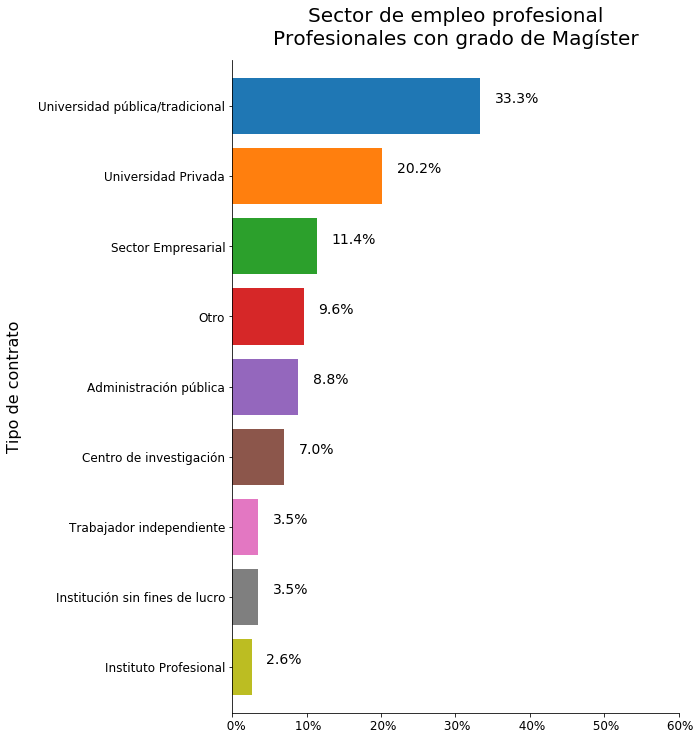

In [67]:
fig, ax = plt.subplots(1,1, figsize=(8,12))
data_plot_pct.plot(kind='barh', ax=ax,
               fontsize=12, rot=0, width=0.8)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.legend(frameon=False)

ax.set_xlim(0,60)
ax.set_ylabel('Tipo de contrato')
plt.title("Sector de empleo profesional\nProfesionales con grado de Magíster")

vals = ax.get_xticks()
ax.set_xticklabels(['{:3.0f}%'.format(x) for x in vals])

for p in ax.patches:
    ax.annotate("{:.1f}%".format(p.get_width()), (p.get_width() + 2, p.get_y()+0.3),
               fontsize=14, horizontalalignment='left', verticalalignment='center')

plt.gca().invert_yaxis()
plt.savefig('figures/magister/figura_5_sector_empleo.png', bbox_inches='tight')
plt.savefig('figures/magister/figura_5_sector_empleo.pdf', bbox_inches='tight')

## Tipos de contratos

In [70]:
data_plot=encuesta_df.groupby('Tipo de contrato').size().sort_values(ascending=False)
data_plot

Tipo de contrato
Contrato indefinido        35
Contrato a honorario       29
Boletear sin contrato      23
Contrato con plazo fijo    21
Otro                        4
Independiente               1
Acuerdo de palabra          1
dtype: int64

In [71]:
data_plot.sum()

114

In [72]:
data_plot_pct=(100*data_plot/data_plot.sum()).round(1)
data_plot_pct

Tipo de contrato
Contrato indefinido        30.7
Contrato a honorario       25.4
Boletear sin contrato      20.2
Contrato con plazo fijo    18.4
Otro                        3.5
Independiente               0.9
Acuerdo de palabra          0.9
dtype: float64

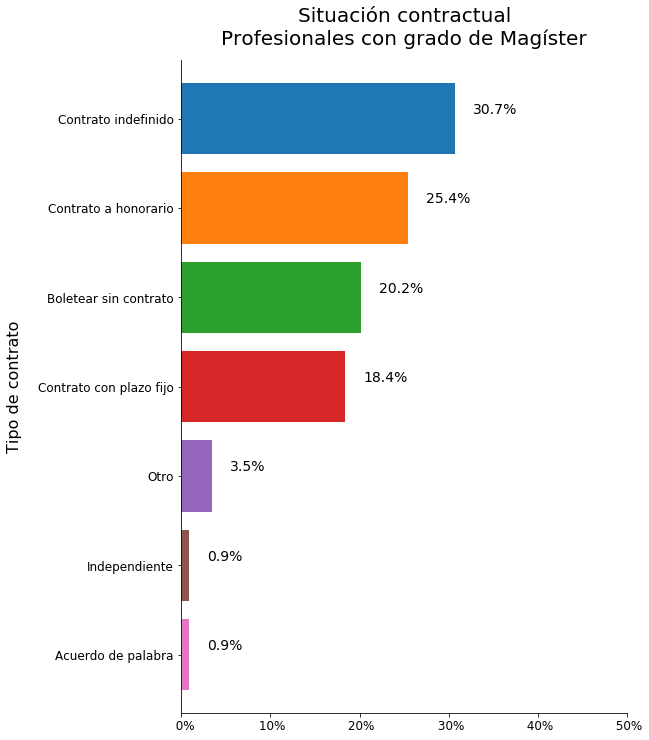

In [73]:
fig, ax = plt.subplots(1,1, figsize=(8,12))
data_plot_pct.plot(kind='barh', ax=ax,
               fontsize=12, rot=0, width=0.8)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.legend(frameon=False)

ax.set_xlim(0,50)
ax.set_ylabel('Tipo de contrato')
plt.title("Situación contractual\nProfesionales con grado de Magíster")

vals = ax.get_xticks()
ax.set_xticklabels(['{:3.0f}%'.format(x) for x in vals])

for p in ax.patches:
    ax.annotate("{:.1f}%".format(p.get_width()), (p.get_width() + 2, p.get_y()+0.3),
               fontsize=14, horizontalalignment='left', verticalalignment='center')

plt.gca().invert_yaxis()
plt.savefig('figures/magister/figura_7_situacion_contractual.png', bbox_inches='tight')
plt.savefig('figures/magister/figura_7_situacion_contractual.pdf', bbox_inches='tight')

Algunas personas respondieron que no volverán a Chile 

No handles with labels found to put in legend.
No handles with labels found to put in legend.


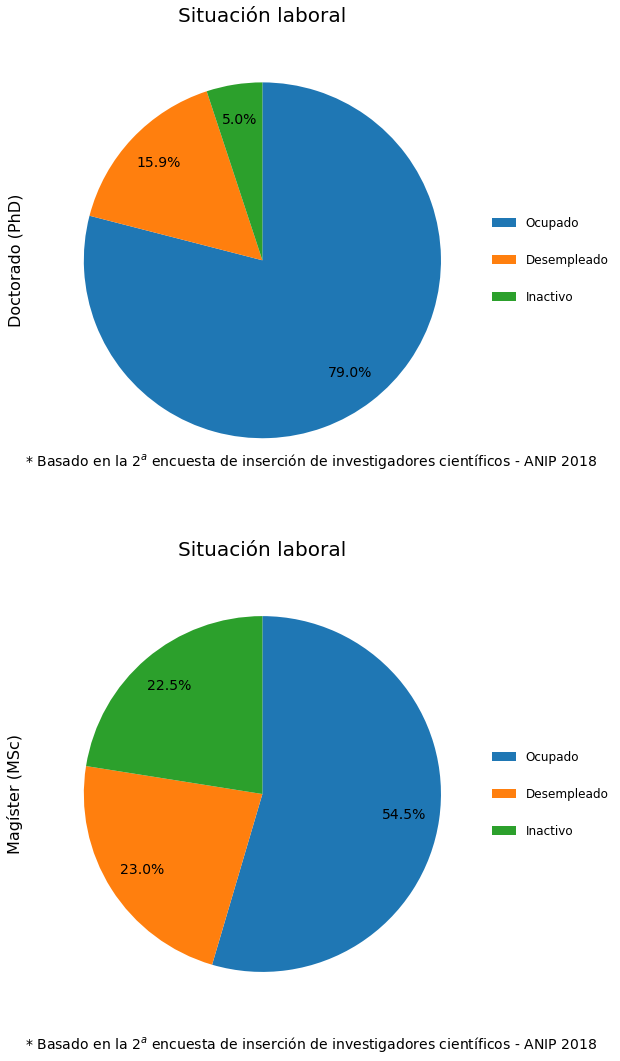

In [137]:
n_row=int(len(data_plot.columns))
n_col=1
fig, axarr = plt.subplots(n_row,n_col, figsize=(8*n_col,(8+1)*n_row))

data_plot.plot(kind='pie', ax=axarr, autopct='%.1f%%', labels=['']*len(data_plot.index),
               pctdistance=0.8, labeldistance=1.2,
               startangle=90, counterclock=False,
               fontsize=14, subplots=True)

for ax in axarr:
    ax.set_title('Situación laboral', fontsize=20)
    ax.legend(labels=data_plot.index, loc='center right',
               bbox_to_anchor=(1.3,0.5), labelspacing=2,
               frameon=False)

plt.figtext(0.1, 0.55, '* Basado en la $2^{a}$ encuesta de inserción de investigadores científicos - ANIP 2018', horizontalalignment='left', size=14)
plt.figtext(0.1, 0.1, '* Basado en la $2^{a}$ encuesta de inserción de investigadores científicos - ANIP 2018', horizontalalignment='left', size=14)

plt.savefig('figures/figura_1_situacion_laboral.jpg', bbox_inches='tight')
plt.savefig('figures/figura_1_situacion_laboral.pdf', bbox_inches='tight')

In [43]:
data_plot=encuesta_df.groupby('Grado académico')['Sector empleo'].value_counts().unstack('Grado académico').sort_values(by='Doctorado (PhD)', ascending=False)
data_plot

Grado académico,Doctorado (PhD),Magíster (MSc)
Sector empleo,,
Universidad pública/tradicional,223,38
Universidad Privada,98,23
Centro de investigación,38,8
Sector Empresarial,21,13
Otro,10,11
Administración pública,7,10
Trabajador independiente,6,4
Institución sin fines de lucro,2,4
Instituto Profesional,2,3


No handles with labels found to put in legend.
No handles with labels found to put in legend.


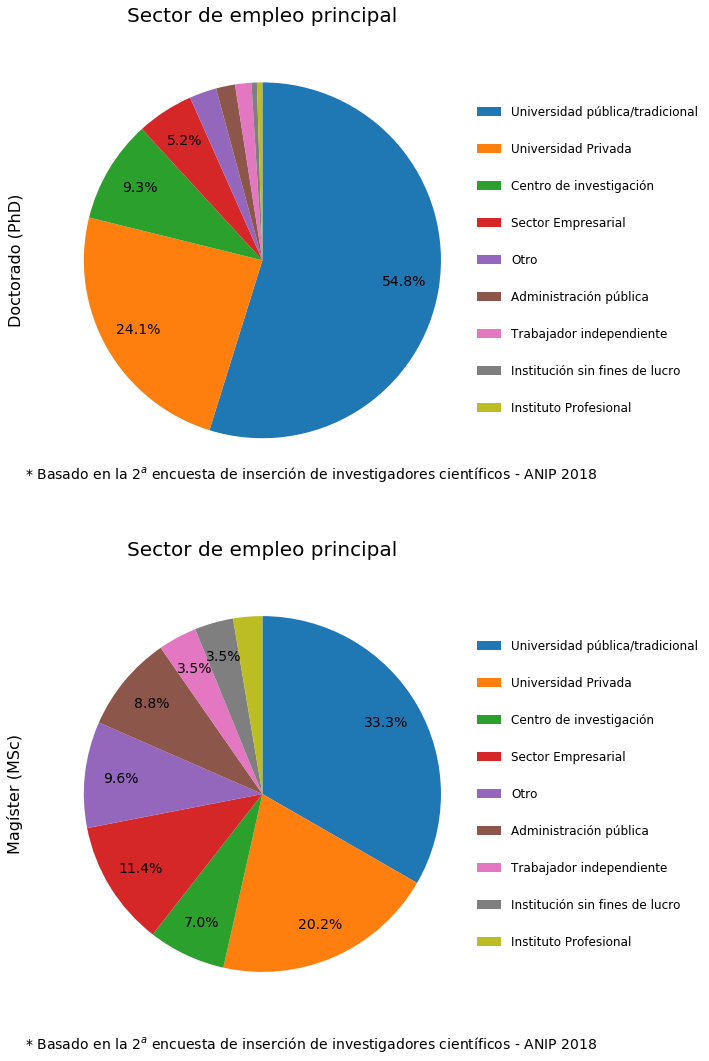

In [44]:
n_row=int(len(data_plot.columns))
n_col=1
fig, axarr = plt.subplots(n_row,n_col, figsize=(8*n_col,(8+1)*n_row))

data_plot.plot(kind='pie', ax=axarr, autopct=autopct_generator(3), labels=['']*len(data_plot.index),
               pctdistance=0.8, labeldistance=1.2,
               startangle=90, counterclock=False,
               fontsize=14, subplots=True)
plt.legend(labels=data_plot.index, loc='center right',
           bbox_to_anchor=(1.5,0.5), labelspacing=2,
           frameon=False)

for ax in axarr:
    ax.set_title('Sector de empleo principal', fontsize=20)
    ax.legend(labels=data_plot.index, loc='center right',
               bbox_to_anchor=(1.5,0.5), labelspacing=2,
               frameon=False)
    
plt.figtext(0.1, 0.54, '* Basado en la $2^{a}$ encuesta de inserción de investigadores científicos - ANIP 2018', horizontalalignment='left', size=14)
plt.figtext(0.1, 0.1, '* Basado en la $2^{a}$ encuesta de inserción de investigadores científicos - ANIP 2018', horizontalalignment='left', size=14)

plt.savefig('figures/figura_2_sector_empleo.jpg', bbox_inches='tight')
plt.savefig('figures/figura_2_sector_empleo.pdf', bbox_inches='tight')

## 4.3 Tipos de contratos por sector

In [75]:
data_plot=encuesta_df.groupby(['Grado académico','Sector empleo'])['Tipo de contrato'].value_counts().unstack(['Grado académico','Sector empleo'])#.sort_values(by='Doctorado (PhD)', ascending=False)
data_plot

Grado académico                               Doctorado (PhD)  \
Sector empleo                          Administración pública   
Tipo de contrato                                                
A honorarios ("Boletear sin contrato")                    NaN   
Acuerdo de palabra                                        NaN   
Contrato a honorario                                      4.0   
Contrato con plazo fijo                                   3.0   
Contrato indefinido                                       NaN   
Independiente                                             NaN   
Otro                                                      NaN   
Sin contrato                                              NaN   

Grado académico                                                 \
Sector empleo                          Centro de investigación   
Tipo de contrato                                                 
A honorarios ("Boletear sin contrato")                     8.0   
Acuerdo de palabra                                         NaN   
Contrato a honorario                                       8.0   
Contrato con plazo fijo                                    8.0   
Contrato indefinido                                       10.0   
Independiente                                              1.0   
Otro                                                       2.0   
Sin contrato                                               1.0   

Grado académico                                                        \
Sector empleo                          Institución sin fines de lucro   
Tipo de contrato                                                        
A honorarios ("Boletear sin contrato")                            NaN   
Acuerdo de palabra                                                NaN   
Contrato a honorario                                              NaN   
Contrato con plazo fijo                                           1.0   
Contrato indefinido                                               1.0   
Independiente                                                     NaN   
Otro                                                              NaN   
Sin contrato                                                      NaN   

Grado académico                                                    \
Sector empleo                          Instituto Profesional Otro   
Tipo de contrato                                                    
A honorarios ("Boletear sin contrato")                   NaN  NaN   
Acuerdo de palabra                                       NaN  NaN   
Contrato a honorario                                     NaN  2.0   
Contrato con plazo fijo                                  1.0  3.0   
Contrato indefinido                                      1.0  5.0   
Independiente                                            NaN  NaN   
Otro                                                     NaN  NaN   
Sin contrato                                             NaN  NaN   

Grado académico                                            \
Sector empleo                          Sector Empresarial   
Tipo de contrato                                            
A honorarios ("Boletear sin contrato")                1.0   
Acuerdo de palabra                                    NaN   
Contrato a honorario                                  2.0   
Contrato con plazo fijo                               3.0   
Contrato indefinido                                  15.0   
Independiente                                         NaN   
Otro                                                  NaN   
Sin contrato                                          NaN   

Grado académico                                                  \
Sector empleo                          Trabajador independiente   
Tipo de contrato                                                  
A honorarios ("Boletear sin contrato")                      NaN   
Acuerdo de palabra                                   

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


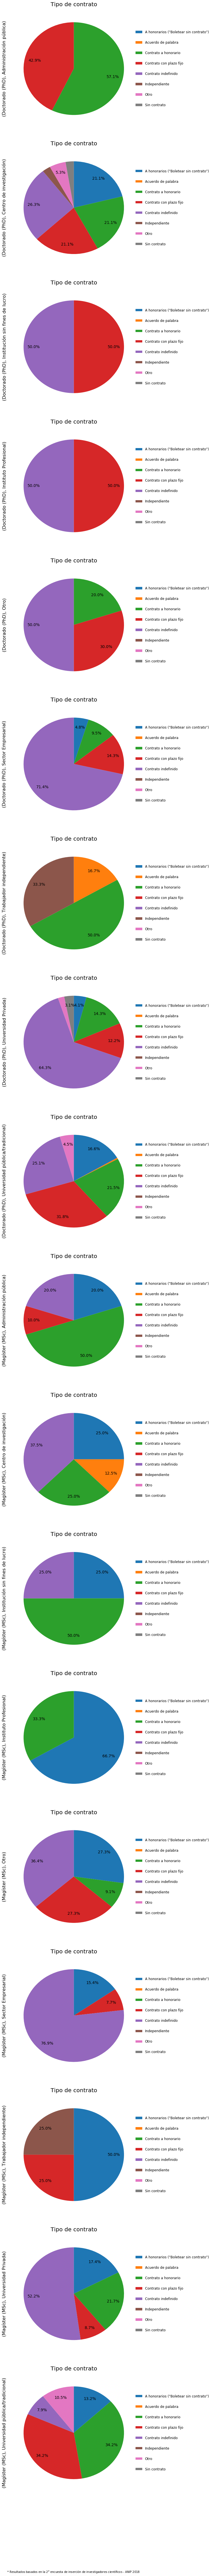

In [46]:
n_row=int(len(data_plot.columns))
n_col=1

fig, axarr = plt.subplots(n_row,n_col, figsize=(8*n_col,(8+1)*n_row))
data_plot.plot(kind='pie', ax=axarr,
               autopct=autopct_generator(3), labels=['']*len(data_plot.index),
               pctdistance=0.8, labeldistance=1.2,
               startangle=90, counterclock=False,
               fontsize=14, subplots=True)

#ax. title('Sector de empleo principal', fontsize=20)
for ax in axarr.reshape(-1):
    ax.set_title('Tipo de contrato', fontsize=20)
    ax.legend(labels=data_plot.index, loc='center right',
               bbox_to_anchor=(1.6,0.5), labelspacing=2,
               frameon=False)

plt.figtext(0.1, 0.1, '* Resultados basados en la $2^{a}$ encuesta de inserción de investigadores científicos - ANIP 2018', horizontalalignment='left')

plt.savefig('figures/figura_3_tipo_de_contrato.jpg', bbox_inches='tight')
plt.savefig('figures/figura_3_tipo_de_contrato.pdf', bbox_inches='tight')

In [85]:
data_plot=encuesta_df.groupby(['Grado académico','Sector empleo'])['Tipo de contrato'].value_counts().unstack(['Grado académico','Sector empleo'])#.sort_values(by='Doctorado (PhD)', ascending=False)
data_plot=data_plot.loc[:,(slice(None),'Universidad pública/tradicional')]

No handles with labels found to put in legend.
No handles with labels found to put in legend.


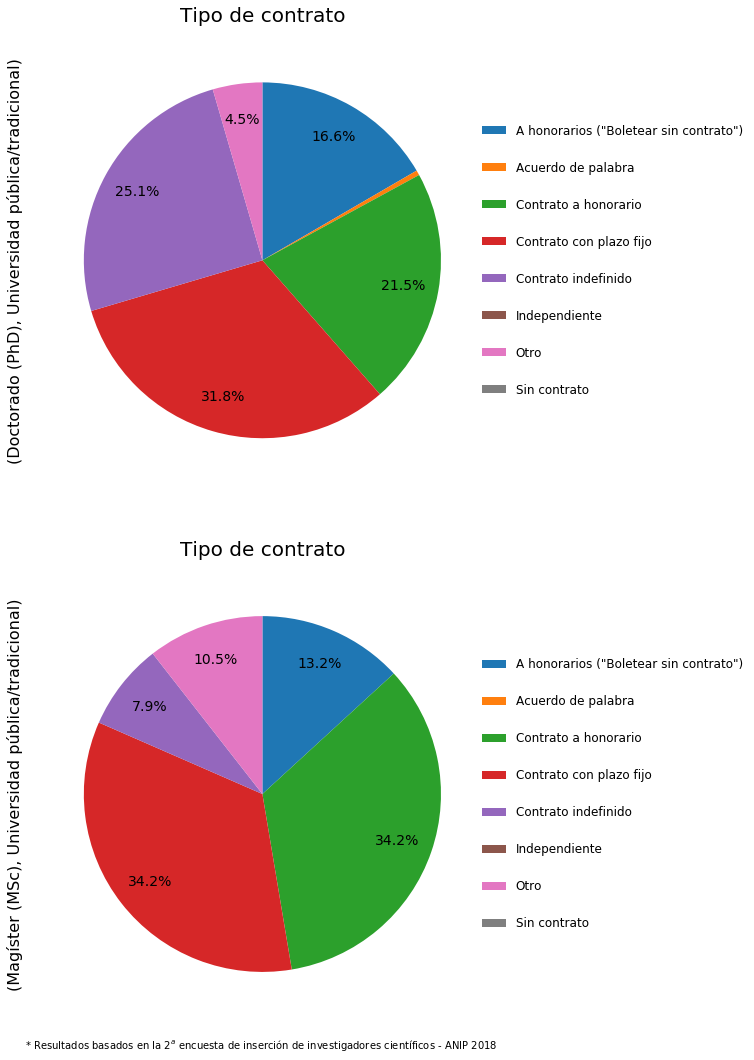

In [86]:
n_row=int(len(data_plot.columns))
n_col=1

fig, axarr = plt.subplots(n_row,n_col, figsize=(8*n_col,(8+1)*n_row))
data_plot.plot(kind='pie', ax=axarr,
               autopct=autopct_generator(3), labels=['']*len(data_plot.index),
               pctdistance=0.8, labeldistance=1.2,
               startangle=90, counterclock=False,
               fontsize=14, subplots=True)

#ax. title('Sector de empleo principal', fontsize=20)
for ax in axarr.reshape(-1):
    ax.set_title('Tipo de contrato', fontsize=20)
    ax.legend(labels=data_plot.index, loc='center right',
               bbox_to_anchor=(1.6,0.5), labelspacing=2,
               frameon=False)

plt.figtext(0.1, 0.1, '* Resultados basados en la $2^{a}$ encuesta de inserción de investigadores científicos - ANIP 2018', horizontalalignment='left')

plt.savefig('figures/figura_4_tipo_de_contrato_Universidad.jpg', bbox_inches='tight')
plt.savefig('figures/figura_4_tipo_de_contrato_Universidad.pdf', bbox_inches='tight')

# 4.4 Análisis calidad trabajo

In [171]:
data_plot=encuesta_df.groupby('Grado académico')['Estabilidad laboral'].value_counts().unstack('Grado académico')
data_plot

Grado académico,Doctorado (PhD),Magíster (MSc)
Estabilidad laboral,,
1,91,32
2,34,7
3,38,12
4,41,17
5,46,15
6,65,13
7,92,18


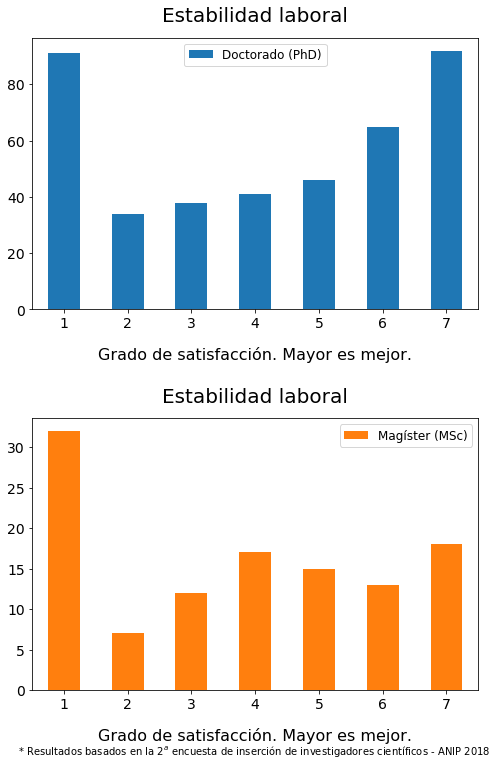

In [172]:
n_row=int(len(data_plot.columns))
n_col=1

fig, axarr = plt.subplots(n_row,n_col, figsize=(8*n_col,6*n_row))
data_plot.plot(kind='bar', ax=axarr, rot=0,
               fontsize=14, subplots=True)

plt.subplots_adjust(hspace=0.4)
plt.figtext(0.1, 0.05, '* Resultados basados en la $2^{a}$ encuesta de inserción de investigadores científicos - ANIP 2018', horizontalalignment='left')

for ax in axarr.reshape(-1):
    ax.set_title('Estabilidad laboral', fontsize=20)
    ax.set_xlabel('Grado de satisfacción. Mayor es mejor.')

plt.savefig('figures/figura_5_estabilidad_laboral.jpg', bbox_inches='tight')
plt.savefig('figures/figura_5_estabilidad_laboral.pdf', bbox_inches='tight')

In [173]:
data_plot=encuesta_df.groupby('Grado académico')['Reto intelectual'].value_counts().unstack('Grado académico')
data_plot

Grado académico,Doctorado (PhD),Magíster (MSc)
Reto intelectual,,
1,17,11
2,13,7
3,21,6
4,36,16
5,57,20
6,91,31
7,172,23


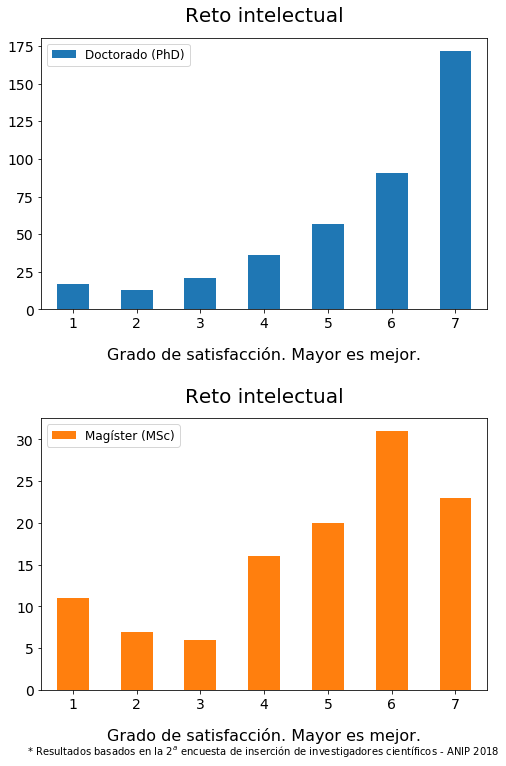

In [174]:
n_row=int(len(data_plot.columns))
n_col=1

fig, axarr = plt.subplots(n_row,n_col, figsize=(8*n_col,6*n_row))
data_plot.plot(kind='bar', ax=axarr, rot=0,
               fontsize=14, subplots=True)

plt.subplots_adjust(hspace=0.4)
plt.figtext(0.1, 0.05, '* Resultados basados en la $2^{a}$ encuesta de inserción de investigadores científicos - ANIP 2018', horizontalalignment='left')

for ax in axarr.reshape(-1):
    ax.set_title('Reto intelectual', fontsize=20)
    ax.set_xlabel('Grado de satisfacción. Mayor es mejor.')

plt.savefig('figures/figura_6_reto_intelectual.jpg', bbox_inches='tight')
plt.savefig('figures/figura_6_reto_intelectual.pdf', bbox_inches='tight')

# OLD

In [ ]:
for field_name in field_names:
    encuesta_full_df[field_name] = encuesta_full_df[field_name].fillna(field_fillna[field_name]).astype(field_dtypes[field_name])

In [ ]:

for key, value in dtypes_new.items():
    encuesta_full_df[key] = encuesta_full_df[key].astype(value)

#encuesta_full_df=encuesta_full_df.infer_objects()
#encuesta_full_df['Genero'] = encuesta_full_df.astype('str')

In [ ]:
field_dtypes={'Genero':str, 'Edad':int, 'Nacionalidad':str}
field_fillna={'Genero':'', 'Edad':0, 'Nacionalidad':''}


